# Optimizer
You may sometimes see the term optimizer or optimization function. This is simply the function that implements the backpropagation  (what does the gradient descent and back propagation for us)
algorithm described above. Here's a list of a few common ones.
.Gradient Descent.
.Stochastic Gradient Descent
.Min-Batch Gradient Descent
.Momentum
.Nesterov Accelerated Gradient
Ihis article explains them quite well is where Ive pulled this list from. *
(https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

# Creating a Neural Network
Okay, now you have reached the exciting part of this tutorial! No more math and complex explanations. Time to get hands-on and train a very
basic neural network.

As stated earlier this guide is based on the following TensorFlow tutorial. https:/www.tensorflow.org/tutorials/keras/classification

In [51]:
import tensorflow as tf 
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Dataset

For this tutorial, we will use **the MNIST Fashion Dataset**. This is a dataset that is included in ~Keras~.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [52]:
fashion_mnist = keras.datasets.fashion_mnist    # load dataset

(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()     # split into testing and training

this data set is essentially pixelled data of clothing articles


In [53]:
## Let's have a look at this data to see what we are working with.

print(train_images.shape)
type(train_images)


(60000, 28, 28)


numpy.ndarray

**so we have 60000 imgs that are 28*28 px (784 in total)**


In [54]:
train_images[0,23,23]   ##the 1st image at row 23 and column 23
#so you're looking at the px (23,23) in the 1st image

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there is no color
channels.

**so** the 194 is the colour of a certain px

In [55]:
train_labels[:10]    # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0-9. Each integer represents a specific article of clothing. Well create an array of label names to indicate
which is which.

In [56]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag' ,"Ankle boot"]

Fianlly let's look at what some of these images look like!

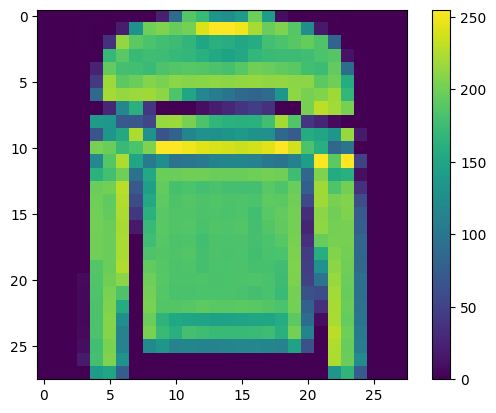

In [57]:
#what to do to show some clothes?

plt.figure()        #make a figure
plt.imshow(train_images [5])    #show the image        #change the index to look at the desired piece of clothes
plt.colorbar()      #do the color bar (the one on the right)
plt.grid(False)     #no grid ((this line is for making sure to hide the grid))
plt.show()      

# Data Preprocessing

The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before
feeding it to the model. In this case we will simply scale all of our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing
each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [58]:
train_images = train_images/ 255.0
test_images= test_images/ 255.0



افتكر ان النيتورك بتاعتك بتبدا بويتس عشوائية  بين ال0وال1 فالخطوة اللي فاتت دي عشان تسهل الكلاسيفيكيشن على النيتوورك 

واوعا تنسي ان اللي عملته في الترينينج لازم في التيستينج

# Building the Model
Now it's time to build the model! We are going to use a keras sequential model with three different layers. This model represents a feed-forward
neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # input layer (1)
    keras.layers.Dense (128, activation= 'relu' ), # hidden layer (2)
    keras.layers.Dense(18, activation='softmax' ) # output layer (3)
])

0]-->**Sequential**: the most basic form of NN which you've studied till now which makes the info goes from left to right (passing through layers sequentially).

[*]-->in the 3 keras lines we are defining the layers we want in our NN

1]-->**Flatten**: allows us to take a shape of 28*28 and flatten those px to 784 px

2]-->**Dense**: means we are making a dens layer (neurons from prev. layers are connected to every neuron in this layer)

3]-->**activation_fn 1**: we used rectified linear unit and i think here **it doesnt really matter**

4]-->**the last layer**: we made 10 output neurons and soft max activation_fn

[*]-->we chose to add 10 output neurons because it's essentiall 
### to have as many neurons as the classes we are predicting for

 and if you look above u have 10 classes 


and lastly we're gonna have probability distribution with softmax activation_fn

#### summary
**Layer 1**: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our
input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that
each pixel will be associated with one neuron.

**Layer 2**: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous
layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unít activation function.

**Layer 3**: This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron
represents the probability of a given image being one of the 10 different classes. The activation function softmax is used on this layer to
calculate a probability distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1
represents a high probability of the image being that class.

# Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why
we chose each of these right now.

In [60]:
model.compile (optimizer= 'adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

**adam**: the algorithm that does gradient descent


-->the previous is called **hyper parameters**
    the parameters that we can adjust and change to manipulate our model(ex: the optimizer, the loss function, the metrics, the activation_fn, epochs)
    [so] you cant change the weights or the biases 


**so** hyper parameter tunning is manually changing those value 


## Training the Model
Now it's finally time to train the model. Since we've already done all of the work on Our data this step is as easy as calling a single method.

In [61]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5043 - accuracy: 0.8232
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3794 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3392 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3118 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2941 - accuracy: 0.8906


***fit***: we are fitting the model to our training data

***notice*** no inp_fn cus keras took care of fo that 

the prev. acc is the acc on our training data


In [62]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print ( 'Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3637 - accuracy: 0.8692
Test accuracy: 0.8691999912261963


the acc. decreased on the testing set, this is called over fitting because it saw the data like alot in the training set 

so what we want is to get the highest accuracy possible for the new data sets 

***so*** we need to make sure that the data generalizes better 

من الاخر غير ال
hyper parameters 


الايبوكس كانت الاول 10 انا هخليها 12

# Making Predictions
To make predictions we simply need to pass an array of data in the form we've specified in the input layer to .predict () method.

In [63]:
predictions= model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


This method returns to us an array of predictions for each image we passed it. Let's have a look at the predictions for image 1.

In [64]:
predictions[0]

array([1.9583181e-06, 1.1610375e-08, 2.0211080e-06, 9.2882868e-10,
       9.4806646e-06, 6.7225583e-03, 6.3075959e-07, 8.9607732e-03,
       4.5251750e-04, 9.8385012e-01, 5.0655383e-12, 1.3698041e-12,
       2.3639161e-13, 1.2133454e-12, 9.5957036e-12, 1.0277029e-11,
       2.0202384e-12, 1.6753350e-12], dtype=float32)

In [65]:
test_images.shape

(10000, 28, 28)

If we want to get the value with the highest score we can use a useful function from numpy called argmax () . This simply returns the index of
the maximium value from a numpy array.

Trouser


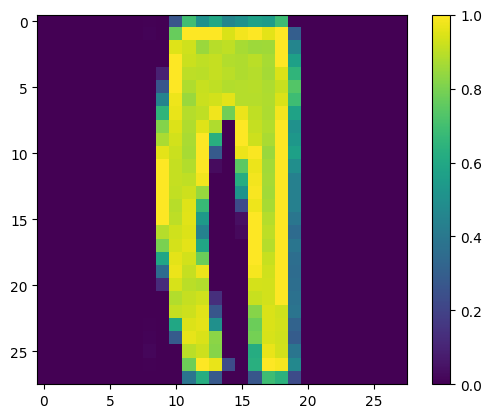

In [66]:
print(class_names[np.argmax(predictions[2])])
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

# Verifying Predictions
    (unnessesary)
I've written a small function here to help us verify predictions with some simple visuals.

what its gonna do is get the number from user and search for the piece of clothe that has that no. and find it then its gonna make a prediction about that piece from the model and show us what it actually is vs what it's supposed to be

1/1 [==============================] - 0s 19ms/step


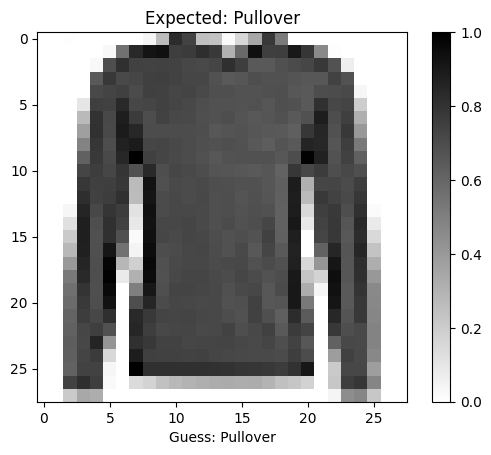

In [69]:
COLOR= 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams ['axes.labelcolor'] = COLOR
def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag' ,"Ankle boot"]
    prediction = model.predict(np.array([image]))
    predicted_class = class_names [np.argmax(prediction)]
    
    show_image(image, class_names[correct_label],predicted_class)
    
    
def show_image (img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: "+ label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()   
    
    
def get_number() :
    while True:
        num = input("Pick a number: ")
        if num.isdigit() :
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Try again..")





num= get_number()
image= test_images[num]
label= test_labels[num]
predict(model, image, label)    
     